In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import env 
import acquire
import prepare


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

titanic_o = acquire.get_titanic_data() 

titanic = prepare.prep_titanic(titanic_o)

train, validate, test = prepare.split_titanic_data(titanic)




# Decision Tree

Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

    What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

    Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

    Evaluate your in-sample results using the model score, confusion matrix, and classification report.

    Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

    Run through steps 2-4 using a different max_depth value.

    Which model performs better on your in-sample data?

    Which model performs best on your out-of-sample data, the validate set?

    Work through these same exercises using the Telco dataset.
    Experiment with this model on other datasets with a higher number of output classes.


In [3]:
titanic_o = acquire.get_titanic_data() 
titanic = prepare.prep_titanic(titanic_o) 

In [4]:
titanic.drop(columns = ['sex', 'embark_town', 'class', 'age'], inplace = True)

In [5]:
train, validate, test = prepare.split_titanic_data(titanic)

In [6]:
titanic_o.shape, titanic.shape, train.shape, validate.shape, test.shape

((891, 10), (891, 11), (569, 11), (143, 11), (179, 11))

In [7]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
829,1,1,0,0,80.000,1,0,0,0,0,0
72,0,2,0,0,73.500,1,1,0,1,1,0
157,0,3,0,0,8.050,1,1,0,1,0,1
889,1,1,0,0,30.000,1,1,0,0,0,0
816,0,3,0,0,7.925,1,0,0,1,0,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 829 to 600
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 569 non-null    int64  
 1   pclass                   569 non-null    int64  
 2   sibsp                    569 non-null    int64  
 3   parch                    569 non-null    int64  
 4   fare                     569 non-null    float64
 5   alone                    569 non-null    int64  
 6   sex_male                 569 non-null    uint8  
 7   embark_town_Queenstown   569 non-null    uint8  
 8   embark_town_Southampton  569 non-null    uint8  
 9   class_Second             569 non-null    uint8  
 10  class_Third              569 non-null    uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 33.9 KB


### 1 Baseline?

In [9]:
train.survived.value_counts()

0    351
1    218
Name: survived, dtype: int64

In [10]:
#baseline is 0 for all. Nobody survived.

In [11]:
1 - train.survived.mean()

0.616871704745167

In [12]:
#accuracy for baseline is 61.69%

In [13]:
#remove 'survived' column since that is our target value and we want to avoid target leakage

In [14]:
x_train = train.drop(columns=["survived"])
y_train = train.survived

x_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

x_test = test.drop(columns=["survived"])
y_test = test.survived

In [15]:
#class method:

In [16]:
y_train.value_counts()

0    351
1    218
Name: survived, dtype: int64

In [17]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


### 2
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [18]:
tree1 = DecisionTreeClassifier(max_depth = 3)

In [19]:
tree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
print(export_text(tree1, feature_names=x_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 28.86
|   |   |   |--- class: 1
|   |   |--- fare >  28.86
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- class: 1
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- fare <= 18.27
|   |   |--- parch <= 0.50
|   |   |   |--- class: 0
|   |   |--- parch >  0.50
|   |   |   |--- class: 0
|   |--- fare >  18.27
|   |   |--- fare <= 19.38
|   |   |   |--- class: 1
|   |   |--- fare >  19.38
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 569\nvalue = [351, 218]'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.371\nsamples = 199\nvalue = [49, 150]'),
 Text(0.125, 0.375, 'fare <= 28.856\ngini = 0.092\nsamples = 104\nvalue = [5, 99]'),
 Text(0.0625, 0.125, 'gini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.1875, 0.125, 'gini = 0.034\nsamples = 58\nvalue = [1, 57]'),
 Text(0.375, 0.375, 'embark_town_Southampton <= 0.5\ngini = 0.497\nsamples = 95\nvalue = [44, 51]'),
 Text(0.3125, 0.125, 'gini = 0.355\nsamples = 39\nvalue = [9, 30]'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 56\nvalue = [35, 21]'),
 Text(0.75, 0.625, 'fare <= 18.275\ngini = 0.3\nsamples = 370\nvalue = [302, 68]'),
 Text(0.625, 0.375, 'parch <= 0.5\ngini = 0.192\nsamples = 241\nvalue = [215, 26]'),
 Text(0.5625, 0.125, 'gini = 0.177\nsamples = 234\nvalue = [211, 23]'),
 Text(0.6875, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.875, 0.375, 'fare <= 19.377\ngini = 0.439\nsamples

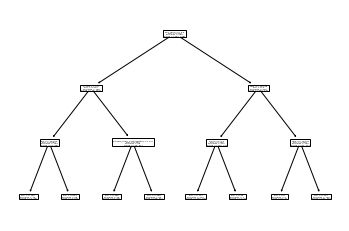

In [21]:
plot_tree(tree1, feature_names=x_train.columns)

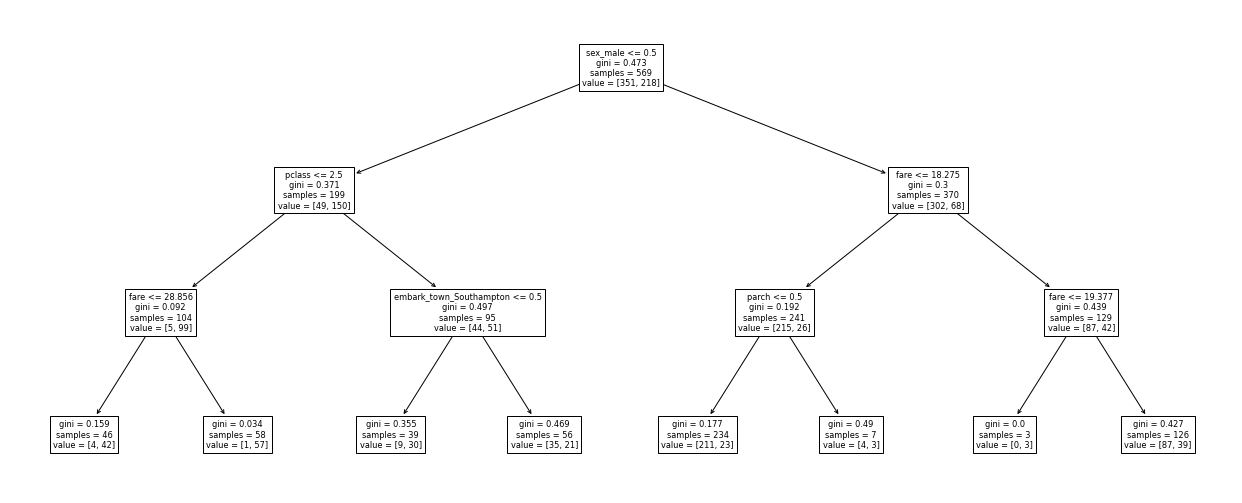

In [22]:
plt.figure(figsize = (22,9))
plot_tree(tree1, feature_names=x_train.columns)
plt.show()

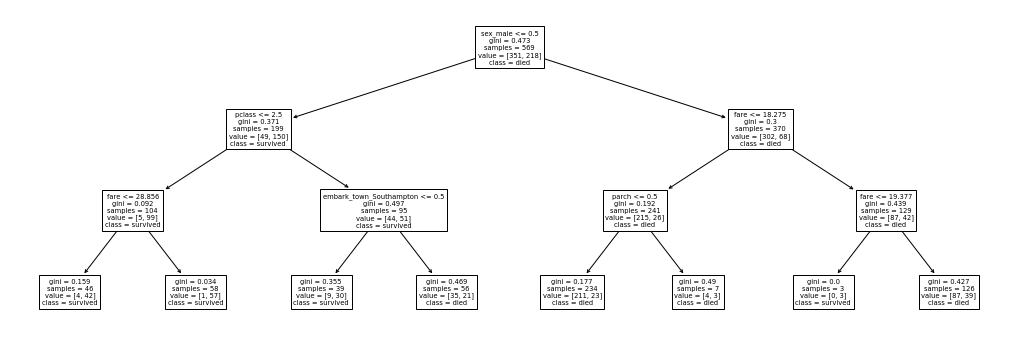

In [23]:
plt.figure(figsize = (18,6))
plot_tree(tree1, feature_names=x_train.columns, class_names=['died','survived'])
plt.show()

In [24]:
tree1.predict(x_train)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [25]:
predictions = tree1.predict(x_train)
actual = y_train

### 3 
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [26]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       351
           1       0.90      0.61      0.73       218

    accuracy                           0.82       569
   macro avg       0.85      0.78      0.80       569
weighted avg       0.84      0.82      0.82       569



In [27]:
#class did the above cell, but also the single next cell

In [28]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(actual, predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report).round(2)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.80,0.90,0.82,0.85,0.84
recall,0.96,0.61,0.82,0.78,0.82
f1-score,0.87,0.73,0.82,0.80,0.82
support,351.00,218.00,0.82,569.00,569.00


In [29]:
#return to my work

In [30]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,337,14
1,86,132


In [31]:
confusion_matrix(actual, predictions)

array([[337,  14],
       [ 86, 132]])

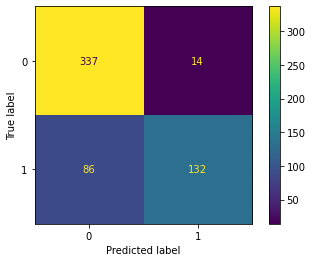

In [32]:
plot_confusion_matrix(tree1, x_train, y_train)

In [33]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree1.score(x_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.78


### It's better than the baseline!

Baseline ~62
tree1 ~78

### 4

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
    

In [34]:
TN, FP, FN, TP = confusion_matrix(actual, predictions).ravel()

In [35]:
TN, FP, FN, TP

(337, 14, 86, 132)

In [36]:
Total = TP + FP + FN + TN

In [37]:
accuracy = (TP + TN)/Total
accuracy

0.8242530755711776

In [38]:
accuracy = (TP + TN)/Total
true_positive_rate = TP/(TP+FN)
false_positive_rate = FP/(FP+TN)
true_negative_rate = TN/(TN+FP)
false_negative_rate = FN/(FN+TP)
precision = TP/(TP+FP)
f1_score = TP/(TP + (.5*(FP+FN)))
support_pos = TP + FN
support_neg = FP + TN

In [39]:
accuracy, true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate, precision, f1_score, support_pos, support_neg 

(0.8242530755711776,
 0.6055045871559633,
 0.039886039886039885,
 0.9601139601139601,
 0.3944954128440367,
 0.9041095890410958,
 0.7252747252747253,
 218,
 351)

In [40]:
#From class review

In [41]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 351
Positive Cases: 218
0    351
1    218
Name: survived, dtype: int64


In [42]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8242530755711776 

True Positive Rate/Sensitivity/Recall/Power: 0.6055045871559633 

False Positive Rate/False Alarm Ratio/Fall-out: 0.039886039886039885 

True Negative Rate/Specificity/Selectivity: 0.9601139601139601 

False Negative Rate/Miss Rate: 0.3944954128440367 

Precision/PPV: 0.9041095890410958 

F1 Score: 0.7252747252747253 

Support (0): 351 

Support (1): 218


### 5

In [43]:
tree2 = DecisionTreeClassifier(max_depth = 19)

In [44]:
tree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=19)

In [45]:
print(export_text(tree2, feature_names=x_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 28.86
|   |   |   |--- fare <= 28.23
|   |   |   |   |--- sibsp <= 0.50
|   |   |   |   |   |--- fare <= 13.25
|   |   |   |   |   |   |--- fare <= 12.82
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- fare >  12.82
|   |   |   |   |   |   |   |--- alone <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- alone >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- fare >  13.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sibsp >  0.50
|   |   |   |   |   |--- parch <= 0.50
|   |   |   |   |   |   |--- embark_town_Southampton <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- embark_town_Southampton >  0.50
|   |   |   |   |   |   |   |--- fare <= 23.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- fare >  23.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |  

[Text(0.47459145642201833, 0.9666666666666667, 'sex_male <= 0.5\ngini = 0.473\nsamples = 569\nvalue = [351, 218]'),
 Text(0.18319954128440366, 0.9, 'pclass <= 2.5\ngini = 0.371\nsamples = 199\nvalue = [49, 150]'),
 Text(0.07339449541284404, 0.8333333333333334, 'fare <= 28.856\ngini = 0.092\nsamples = 104\nvalue = [5, 99]'),
 Text(0.05504587155963303, 0.7666666666666667, 'fare <= 28.231\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.045871559633027525, 0.7, 'sibsp <= 0.5\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.027522935779816515, 0.6333333333333333, 'fare <= 13.25\ngini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(0.01834862385321101, 0.5666666666666667, 'fare <= 12.825\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.009174311926605505, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.027522935779816515, 0.5, 'alone <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.01834862385321101, 0.43333333333333335, 'gini = 0.0\nsamples = 1\nva

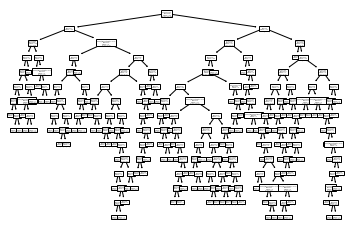

In [46]:
plot_tree(tree2, feature_names=x_train.columns)

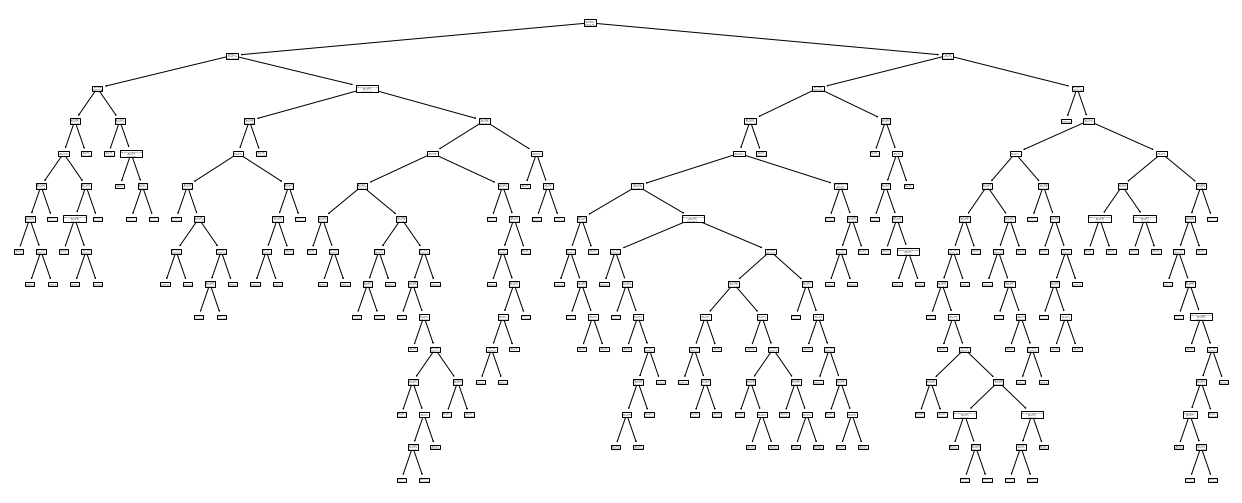

In [47]:
plt.figure(figsize = (22,9))
plot_tree(tree2, feature_names=x_train.columns)
plt.show()

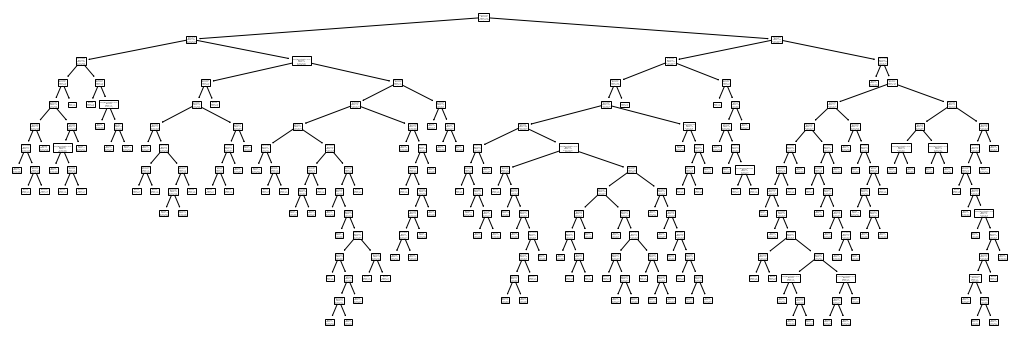

In [48]:
plt.figure(figsize = (18,6))
plot_tree(tree2, feature_names=x_train.columns, class_names=['died','survived'])
plt.show()

In [49]:
tree2.predict(x_train)

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [50]:
predictions = tree2.predict(x_train)
actual = y_train

### 5/3 
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [51]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       351
           1       0.98      0.86      0.92       218

    accuracy                           0.94       569
   macro avg       0.95      0.93      0.94       569
weighted avg       0.95      0.94      0.94       569



In [52]:
#class did the above cell, but also the single next cell

In [53]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(actual, predictions, output_dict=True)
print("Tree of 2 depth")
pd.DataFrame(report).round(2)

Tree of 2 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.92,0.98,0.94,0.95,0.95
recall,0.99,0.86,0.94,0.93,0.94
f1-score,0.95,0.92,0.94,0.94,0.94
support,351.00,218.00,0.94,569.00,569.00


In [54]:
#return to my work

In [55]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,348,3
1,30,188


In [56]:
confusion_matrix(actual, predictions)

array([[348,   3],
       [ 30, 188]])

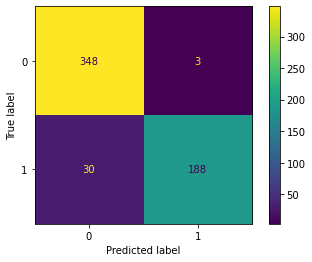

In [57]:
plot_confusion_matrix(tree2, x_train, y_train)

In [58]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree2.score(x_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.78


### It's better than the baseline and about the same as tree1

Baseline ~62
tree1 ~78
tree2 ~78

### 5/4

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
    

In [59]:
TN, FP, FN, TP = confusion_matrix(actual, predictions).ravel()

In [60]:
TN, FP, FN, TP

(348, 3, 30, 188)

In [61]:
Total = TP + FP + FN + TN

In [62]:
accuracy = (TP + TN)/Total
accuracy

0.9420035149384886

In [63]:
accuracy = (TP + TN)/Total
true_positive_rate = TP/(TP+FN)
false_positive_rate = FP/(FP+TN)
true_negative_rate = TN/(TN+FP)
false_negative_rate = FN/(FN+TP)
precision = TP/(TP+FP)
f1_score = TP/(TP + (.5*(FP+FN)))
support_pos = TP + FN
support_neg = FP + TN

In [64]:
accuracy, true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate, precision, f1_score, support_pos, support_neg 

(0.9420035149384886,
 0.8623853211009175,
 0.008547008547008548,
 0.9914529914529915,
 0.13761467889908258,
 0.9842931937172775,
 0.9193154034229829,
 218,
 351)

In [65]:
#From class review

In [66]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 351
Positive Cases: 218
0    351
1    218
Name: survived, dtype: int64


In [67]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9420035149384886 

True Positive Rate/Sensitivity/Recall/Power: 0.8623853211009175 

False Positive Rate/False Alarm Ratio/Fall-out: 0.008547008547008548 

True Negative Rate/Specificity/Selectivity: 0.9914529914529915 

False Negative Rate/Miss Rate: 0.13761467889908258 

Precision/PPV: 0.9842931937172775 

F1 Score: 0.9193154034229829 

Support (0): 351 

Support (1): 218


In [ ]:
#from class

In [70]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(x_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.816216    0.753769  0.794376    0.784993      0.792291
recall       0.860399    0.688073  0.794376    0.774236      0.794376
f1-score     0.837725    0.719424  0.794376    0.778575      0.792401
support    351.000000  218.000000  0.794376  569.000000    569.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.816216    0.753769  0.794376    0.784993      0.792291
recall       0.860399    0.688073  0.794376    0.774236      0.794376
f1-score     0.837725    0.719424  0.794376    0.778575      0.792401
support    351.000000  218.000000  0.794376  569.000000    569.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.796690    0.904110  0.824253    0.850400      0.837846
recall       0.960114    0.605505  0.824253    0.782809      0.824253
f1-score     

# 6 
Which model performs better on your in-sample data?

seems 13 and up are good. be careful of overfitting in the higher depths

# 7 
Which model performs best on your out-of-sample data, the validate set?

In [ ]:
#updated to match class review

In [72]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_accuracy = tree.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.794376,0.762238,0.032138
1,2,0.794376,0.762238,0.032138
2,3,0.824253,0.776224,0.048029
3,4,0.826011,0.776224,0.049787
4,5,0.847100,0.755245,0.091855
5,6,0.875220,0.783217,0.092003
6,7,0.887522,0.776224,0.111298
7,8,0.903339,0.755245,0.148094
8,9,0.915641,0.769231,0.146411
9,10,0.924429,0.769231,0.155198


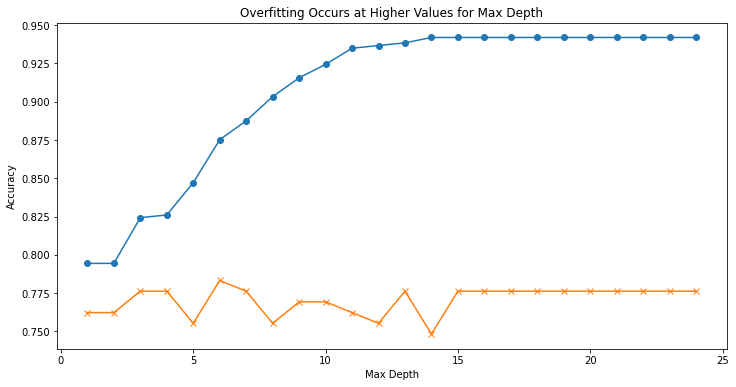

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'x')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [75]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
5,6,0.875220,0.783217,0.092003
2,3,0.824253,0.776224,0.048029
3,4,0.826011,0.776224,0.049787
0,1,0.794376,0.762238,0.032138
1,2,0.794376,0.762238,0.032138
4,5,0.847100,0.755245,0.091855


# Random Forest

Exercises

Continue working in your model file with titanic data to do the following:

    Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

    Evaluate your results using the model score, confusion matrix, and classification report.

    Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

    Run through steps increasing your min_samples_leaf and decreasing your max_depth.

    What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [68]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
829,1,1,0,0,80.000,1,0,0,0,0,0
72,0,2,0,0,73.500,1,1,0,1,1,0
157,0,3,0,0,8.050,1,1,0,1,0,1
889,1,1,0,0,30.000,1,1,0,0,0,0
816,0,3,0,0,7.925,1,0,0,1,0,1


# KNN Exercises 

Exercises

Continue working in your model file with the titanic dataset.

    Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

    Evaluate your results using the model score, confusion matrix, and classification report.

    Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

    Run through steps 2-4 setting k to 10

    Run through setps 2-4 setting k to 20

    What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

    Which model performs best on our out-of-sample data from validate?


# Logistic Regression

Exercises

In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.

    Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

    Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

    Try out other combinations of features and models.

    Use you best 3 models to predict and evaluate on your validate sample.

    Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?


Bonus1 How do different strategies for handling the missing values in the age column affect model performance?

Bonus2: How do different strategies for encoding sex affect model performance?

Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected. C=.01,.1,1,10,100,1000

Bonus Bonus: how does scaling the data interact with your choice of C?